In [1]:
import tkinter
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import PIL
import os
import pandas as pd
from tkinter import Tk, Label
from PIL import Image, ImageTk
import tkinter as tk

In [2]:
dataframe = pd.read_csv("video_2024_11_19_11-04-50.csv")

In [3]:
dataframe.head(10)

,name,label,score,x_min,y_min,x_max,y_max
0,frame_0000.jpg,stairs,0.792086,174,185,558,478
1,frame_0001.jpg,stairs,0.777504,172,185,560,479
2,frame_0002.jpg,stairs,0.800504,172,185,560,478
3,frame_0003.jpg,stairs,0.806760,169,185,560,478
4,frame_0004.jpg,stairs,0.769840,163,184,559,479
5,frame_0005.jpg,stairs,0.781672,164,184,559,479
6,frame_0006.jpg,stairs,0.630473,169,184,562,479
7,frame_0007.jpg,stairs,0.772960,175,184,566,479
8,frame_0008.jpg,stairs,0.785416,171,183,569,478
9,frame_0009.jpg,stairs,0.735279,171,183,569,478


In [4]:
class DataLoader:
    def __init__(self, path):
        self.path = path
        self.dir_name = os.path.basename(path)
        self.height = 480
        self.width = 640
        self.channels = 3
        
    def load_folder(self):
        image_files = glob.glob(f"{self.path}/*.jpg")
        image_names = [os.path.basename(image) for image in image_files]
        length = np.shape(image_files)[0]
        image_array = np.zeros((length, self.height, self.width, self.channels))
        for i, image in enumerate(image_files):
            img = cv2.imread(image)
            if img is not None:
                image_array[i,:,:,:] = img
        return image_names, image_array
        
    def load_video(self):
        raise NotImplementedError

In [5]:
loader = DataLoader(r"C:\Users\Piotr\PycharmProjects\VID2FRAME\video_2024_11_19_11-04-50")

In [6]:
names, images = loader.load_folder()

**TRZEBA UTWORZYĆ MASKĘ**

* Maska ma być utworzona w taki sposób, aby była pewność, że obraz o nazwie X ma zarówno wyniki bboxa oraz zdjęcie.
* Możliwe jest parukrotne wystąpienie tego samego zdjęcia (parę obiektów na obrazie).

In [7]:
# for row in dataframe.itertuples():
#     print(f"{row.name}: {row.score}")

In [8]:
name_series = pd.Series(names)
name_frame = dataframe['name']

In [9]:
# funkcja do radzenia sobie z problemem brakujących danych
def assign_idx(list1, list_ref):
    result = np.zeros(len(list1))
    for inx, name in enumerate(list1):
        for i, nm in enumerate(list_ref):
            if name == nm:
                result[inx] = i
    return result

In [10]:
mask = assign_idx(name_frame, name_series)
mask = mask.astype(int)

In [11]:
np.shape(mask), mask.dtype

((317,), dtype('int64'))

In [12]:
mask

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117,
       119, 120, 121, 122, 123, 124, 125, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 143, 144, 145,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

In [13]:
labeled_images = []

In [14]:
labeled_images = []
x_min = dataframe["x_min"]
y_min = dataframe["y_min"]
x_max = dataframe["x_max"]
y_max = dataframe["y_max"]


for i, u in enumerate(mask):
    cv2.rectangle(images[u], (x_min[i], y_min[i]), (x_max[i], y_max[i]), (0,0,255),2)
    labeled_images.append(images[i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

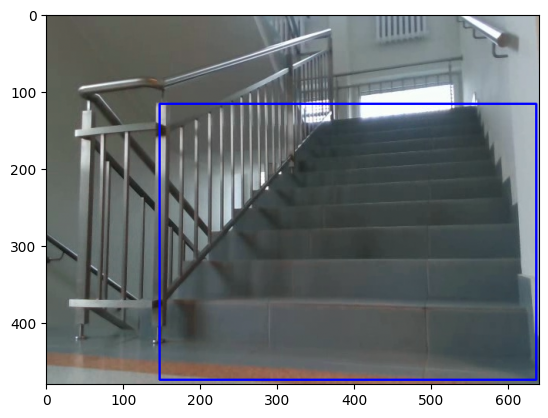

In [15]:
plt.imshow(labeled_images[316]/255)

In [16]:
pil_images = []

for img in labeled_images:
    opencv_image = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(opencv_image)
    pil_images.append(pil_image)

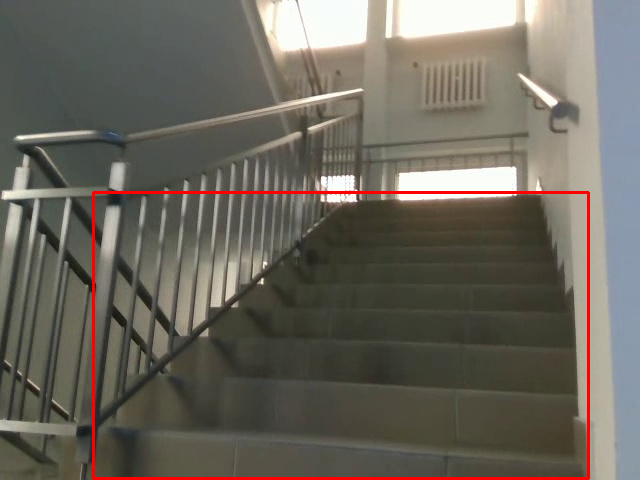

In [17]:
pil_images[90]

In [18]:
np.shape(pil_images[1])

(480, 640, 3)

In [29]:
def display():
    # Odczytanie wartości zmiennej powiązanej z suwakiem
    current_value = scale_var.get()
    label.config(text=f"IMAGE NAME: {names[current_value]}")
    global tk_image
    tk_image = ImageTk.PhotoImage(pil_images[current_value])
    label_photo.config(image=tk_image)

def on_button_click():
    current_value = scale_var.get()
    global remove_list
    to_remove = names[current_value]
    remove_list.append(to_remove)
    txt = remove_list[-1]
    listbox.insert(tk.END, txt)

def on_button_click2():
    listbox.delete(tk.END)
    global remove_list
    remove_list.pop()

remove_list = []

root = Tk()
root.title("RESULTS")

scale_var = tk.IntVar()

image = pil_images[scale_var.get()]
tk_image = ImageTk.PhotoImage(image)

# Utwórz etykietę do wyświetlenia obrazu
label_photo = Label(root, image=tk_image)
label_photo.pack()

left_frame = tk.Frame(root)
left_frame.pack(side="left", padx=10, pady=10)

listbox = tk.Listbox(left_frame, height=10, width=20, font=("Arial", 12))
for item in remove_list:
    listbox.insert(tk.END, item)  # Insert each item from the list into the Listbox
listbox.pack()

scale = tk.Scale(
    root, 
    from_=0,       # Minimalna wartość
    to=len(pil_images)-1,         # Maksymalna wartość
    resolution=1,  # Krok zmiany
    orient="horizontal",  # Orientacja pozioma
    length=300,      # Długość suwaka
    label="Choose number",  # Etykieta
    variable=scale_var,  # Powiązanie z zmienną
    command=lambda _: display()  # Aktualizacja wyświetlenia
)
scale.pack(pady=10)

label = tk.Label(root, text=f"IMAGE: {names[0]}")
label.pack(pady=10)

button = tk.Button(root, text="Remove From Set", command=on_button_click)
button.pack(pady=10)

button2 = tk.Button(root, text="Redo Removal", command=on_button_click2)
button2.pack(padx=10)



root.mainloop()

In [30]:
remove_list

['frame_0249.jpg']

In [31]:
mask = dataframe['name'].isin(remove_list)
df2 = dataframe[~mask]

In [32]:
df2.head(100)

,name,label,score,x_min,y_min,x_max,y_max
0,frame_0000.jpg,stairs,0.792086,174,185,558,478
1,frame_0001.jpg,stairs,0.777504,172,185,560,479
2,frame_0002.jpg,stairs,0.800504,172,185,560,478
3,frame_0003.jpg,stairs,0.806760,169,185,560,478
4,frame_0004.jpg,stairs,0.769840,163,184,559,479
...,...,...,...,...,...,...,...
95,frame_0095.jpg,stairs,0.808987,91,176,586,479
96,frame_0096.jpg,stairs,0.553899,90,173,582,478
97,frame_0097.jpg,stairs,0.456149,77,170,578,478
98,frame_0098.jpg,stairs,0.461502,65,169,581,478
